# Forbes Billionaires Analysis (1997–2024)
## 1. Introduction :
The Forbes Billionaires List is an annual ranking of the world’s wealthiest individuals, compiled by Forbes magazine. This dataset spans from 1997 to 2024 and includes detailed information about billionaires such as their net worth, industry, country of citizenship, and age.
This analysis aims to explore global wealth trends over time, uncover patterns among billionaires, and understand how the distribution of wealth has evolved across countries, industries, and demographics.
## 2. Objective :
### The goal of this analysis is to :
### 1.Track the growth in the number of billionaires from 1997 to 2024.
### 2.Analyze the distribution of billionaires by country, industry, and gender.
### 3.Understand the evolution of net worth over time.
### 4.Identify patterns in age, industry dominance, and wealth concentration.
### 5.Reveal key trends and shifts in global economic power based on billionaire data.

## 3. Data Overview :
link of the dataset : https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

In [ ]:
# Load the data
df=pd.read_csv("/content/all_billionaires_1997_2024.csv")
df.head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34511 entries, 0 to 34510
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      34511 non-null  int64  
 1   month                     34511 non-null  int64  
 2   rank                      34493 non-null  float64
 3   net_worth                 34511 non-null  object 
 4   last_name                 30822 non-null  object 
 5   first_name                30760 non-null  object 
 6   full_name                 34511 non-null  object 
 7   birth_date                30044 non-null  object 
 8   age                       33765 non-null  float64
 9   gender                    30682 non-null  object 
 10  country_of_citizenship    34502 non-null  object 
 11  country_of_residence      33792 non-null  object 
 12  city_of_residence         33514 non-null  object 
 13  business_category         28669 non-null  object 
 14  busine

In [ ]:
df.describe()

,year,month,rank,age
count,34511.000000,34511.000000,34493.000000,33765.000000
mean,2016.420011,3.415346,940.663091,63.065630
std,5.858856,0.604495,669.022554,14.137851
min,1997.000000,2.000000,0.000000,0.000000
25%,2013.000000,3.000000,379.000000,54.000000
50%,2018.000000,3.000000,814.000000,63.000000
75%,2021.000000,4.000000,1415.000000,73.000000
max,2024.000000,7.000000,2692.000000,102.000000


## 4. Data Cleaning & Preparation :
###In this section, we clean and prepare the data for analysis. Steps include:
### 1.Converting net worth to numeric format.
### 2.Handling missing values

In [ ]:
df['net_worth_numeric'] = df['net_worth'].str.replace(' B', '').astype(float)
# Extract year for time-based analysis
df['year'] = pd.to_numeric(df['year'])

print("Data distribution by year:")
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

Data distribution by year:
year
1997       2
1998       1
1999       8
2000       8
2001     335
2002     333
2003     332
2004     432
2005     530
2006     628
2007     761
2008     908
2009     738
2010    1011
2011    1209
2012    1226
2013    1426
2014    1645
2015    1826
2016    1811
2017    2043
2018    2208
2019    2153
2020    2094
2021    2754
2022    2668
2023    2640
2024    2781
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34511 entries, 0 to 34510
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      34511 non-null  int64  
 1   month                     34511 non-null  int64  
 2   rank                      34493 non-null  float64
 3   net_worth                 34511 non-null  object 
 4   last_name                 30822 non-null  object 
 5   first_name                30760 non-null  object 
 6   full_name                 34511 non-null  object 
 7   birth_date                30044 non-null  object 
 8   age                       33765 non-null  float64
 9   gender                    30682 non-null  object 
 10  country_of_citizenship    34502 non-null  object 
 11  country_of_residence      33792 non-null  object 
 12  city_of_residence         33514 non-null  object 
 13  business_category         28669 non-null  object 
 14  busine

## 5.Data Analysis :
### 1. BILLIONAIRE COUNT OVER TIME

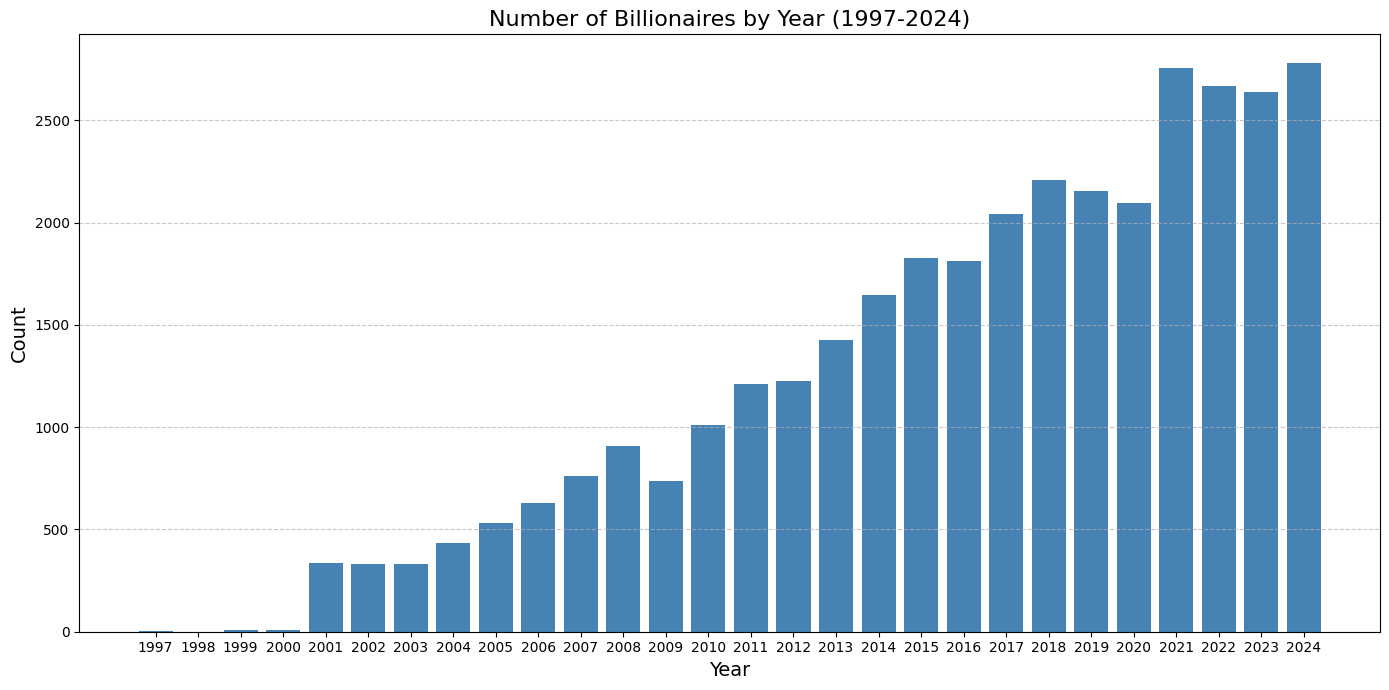

In [ ]:
plt.figure(figsize=(14, 7))
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='steelblue')
plt.title('Number of Billionaires by Year (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(year_counts.index)
plt.tight_layout()
plt.savefig('billionaires_count_by_year.png')

### 2. NET WORTH TRENDS OVER TIME

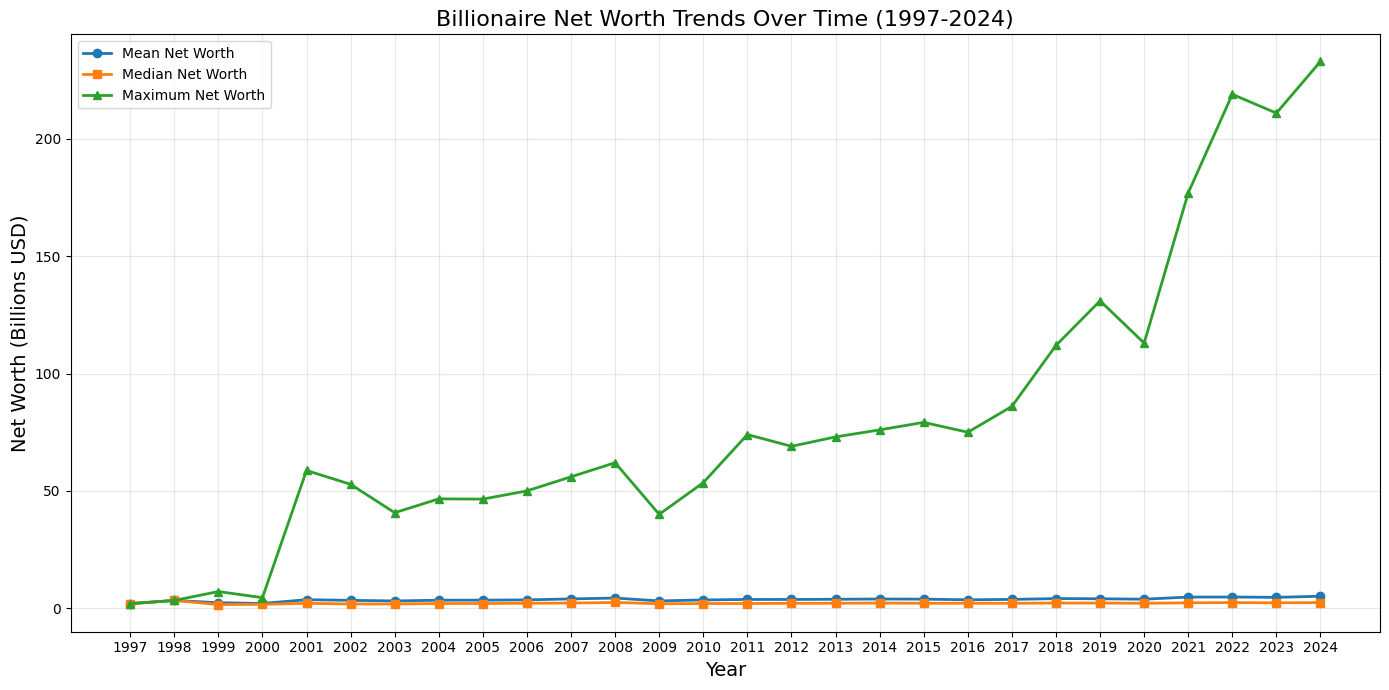

In [ ]:
yearly_stats = df.groupby('year').agg(
    mean_net_worth=('net_worth_numeric', 'mean'),
    median_net_worth=('net_worth_numeric', 'median'),
    max_net_worth=('net_worth_numeric', 'max'),
    count=('net_worth_numeric', 'count')
).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(yearly_stats['year'], yearly_stats['mean_net_worth'], marker='o', linewidth=2, label='Mean Net Worth')
plt.plot(yearly_stats['year'], yearly_stats['median_net_worth'], marker='s', linewidth=2, label='Median Net Worth')
plt.plot(yearly_stats['year'], yearly_stats['max_net_worth'], marker='^', linewidth=2, label='Maximum Net Worth')
plt.title('Billionaire Net Worth Trends Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Worth (Billions USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(yearly_stats['year'])
plt.tight_layout()
plt.savefig('net_worth_trends_by_year.png')

### 3. YEARLY NET WORTH DISTRIBUTIONS - VIOLIN PLOTS

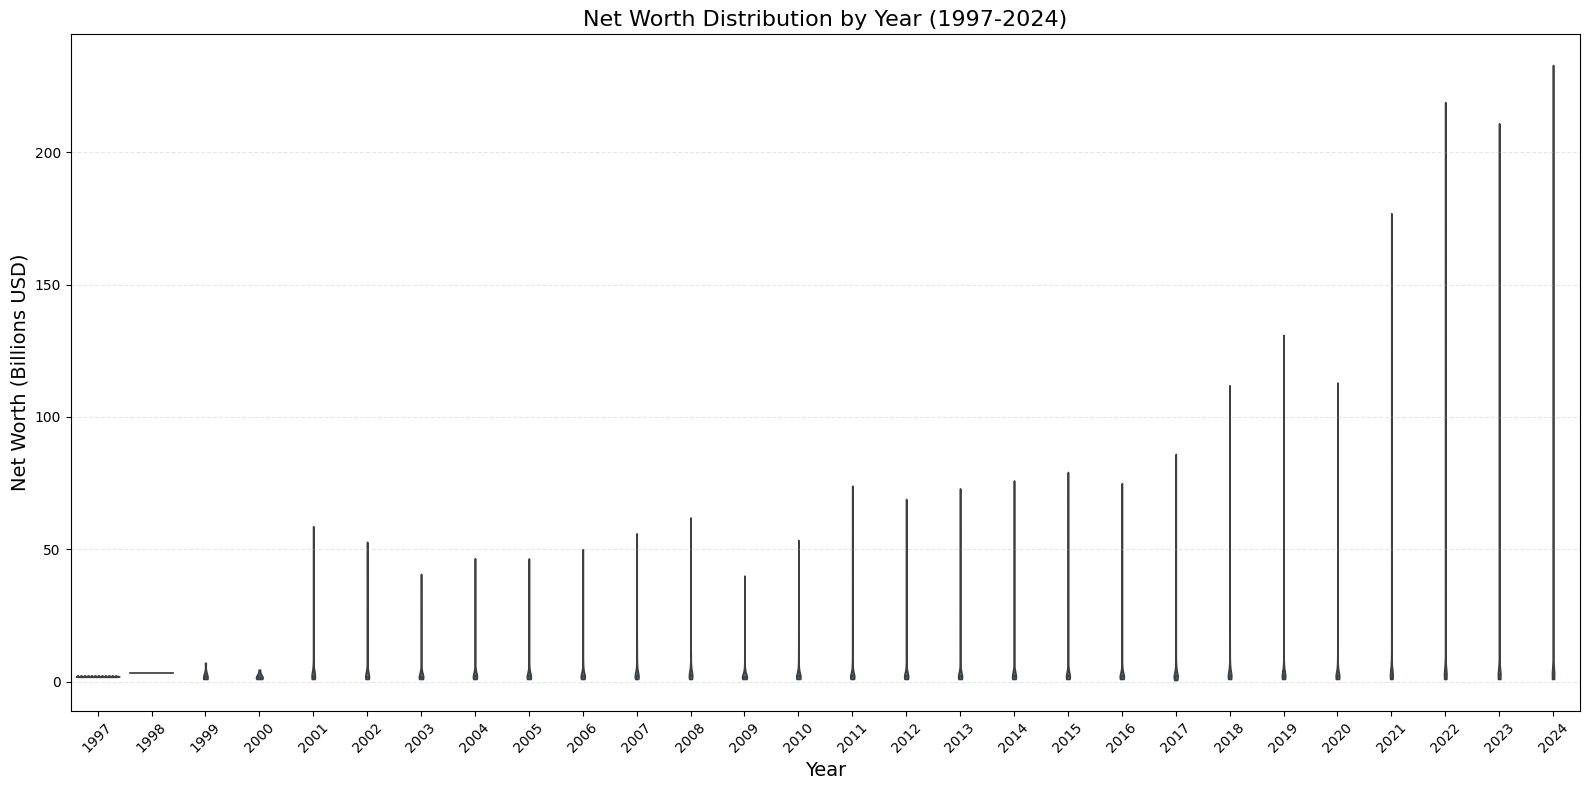

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='year', y='net_worth_numeric', data=df, cut=0, inner='quartile')
plt.title('Net Worth Distribution by Year (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Worth (Billions USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('net_worth_distribution_by_year_violin.png')

### 4. GENDER COMPOSITION OVER TIME

<Figure size 1400x700 with 0 Axes>

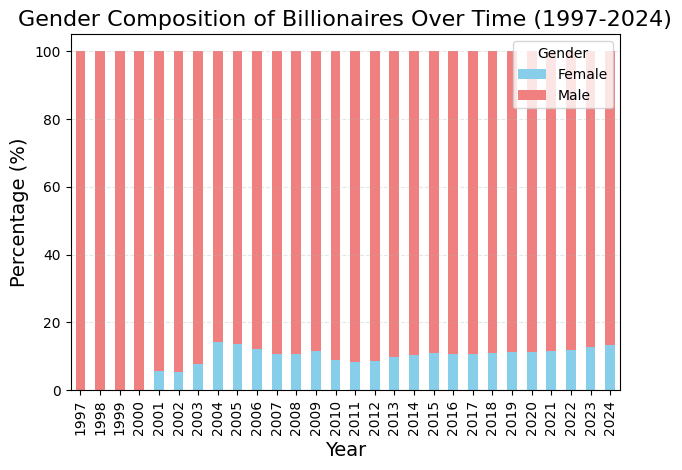

In [ ]:
gender_by_year = pd.crosstab(df['year'], df['gender'])
gender_by_year_pct = gender_by_year.div(gender_by_year.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
gender_by_year_pct.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Gender Composition of Billionaires Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_composition_by_year.png')

###  5. SELF-MADE VS INHERITED WEALTH OVER TIME

<Figure size 1400x700 with 0 Axes>

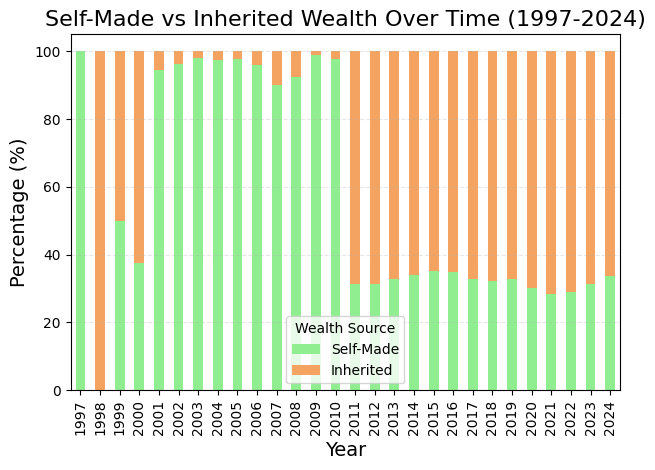

In [ ]:
selfmade_by_year = pd.crosstab(df['year'], df['self_made'])
selfmade_by_year_pct = selfmade_by_year.div(selfmade_by_year.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
selfmade_by_year_pct.plot(kind='bar', stacked=True, color=['lightgreen', 'sandybrown'])
plt.title('Self-Made vs Inherited Wealth Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(['Self-Made', 'Inherited'], title='Wealth Source')
plt.tight_layout()
plt.savefig('selfmade_vs_inherited_by_year.png')

<Figure size 1400x700 with 0 Axes>

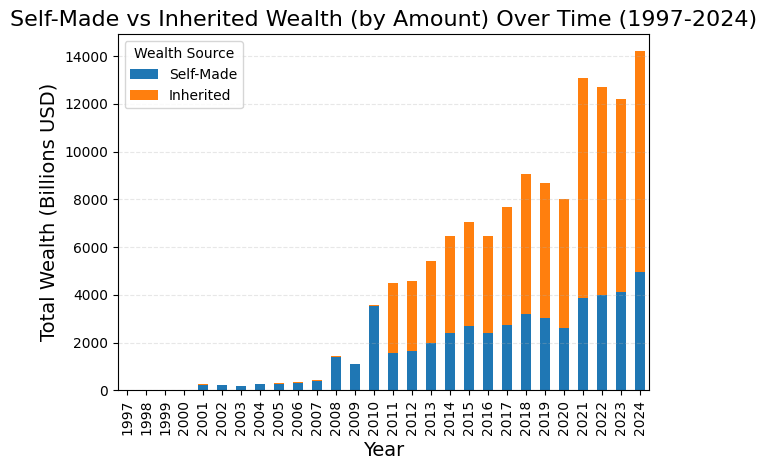

In [ ]:
# Calculate wealth_by_year
wealth_by_year = df.groupby(['year', 'self_made'])['net_worth_numeric'].sum().unstack()

plt.figure(figsize=(14, 7))
wealth_by_year.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Self-Made vs Inherited Wealth (by Amount) Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Wealth (Billions USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(['Self-Made', 'Inherited'], title='Wealth Source')
plt.tight_layout()
plt.savefig('wealth_by_source_over_time_amount.png')


### 6. TOP COUNTRIES OVER TIME

<Figure size 1500x800 with 0 Axes>

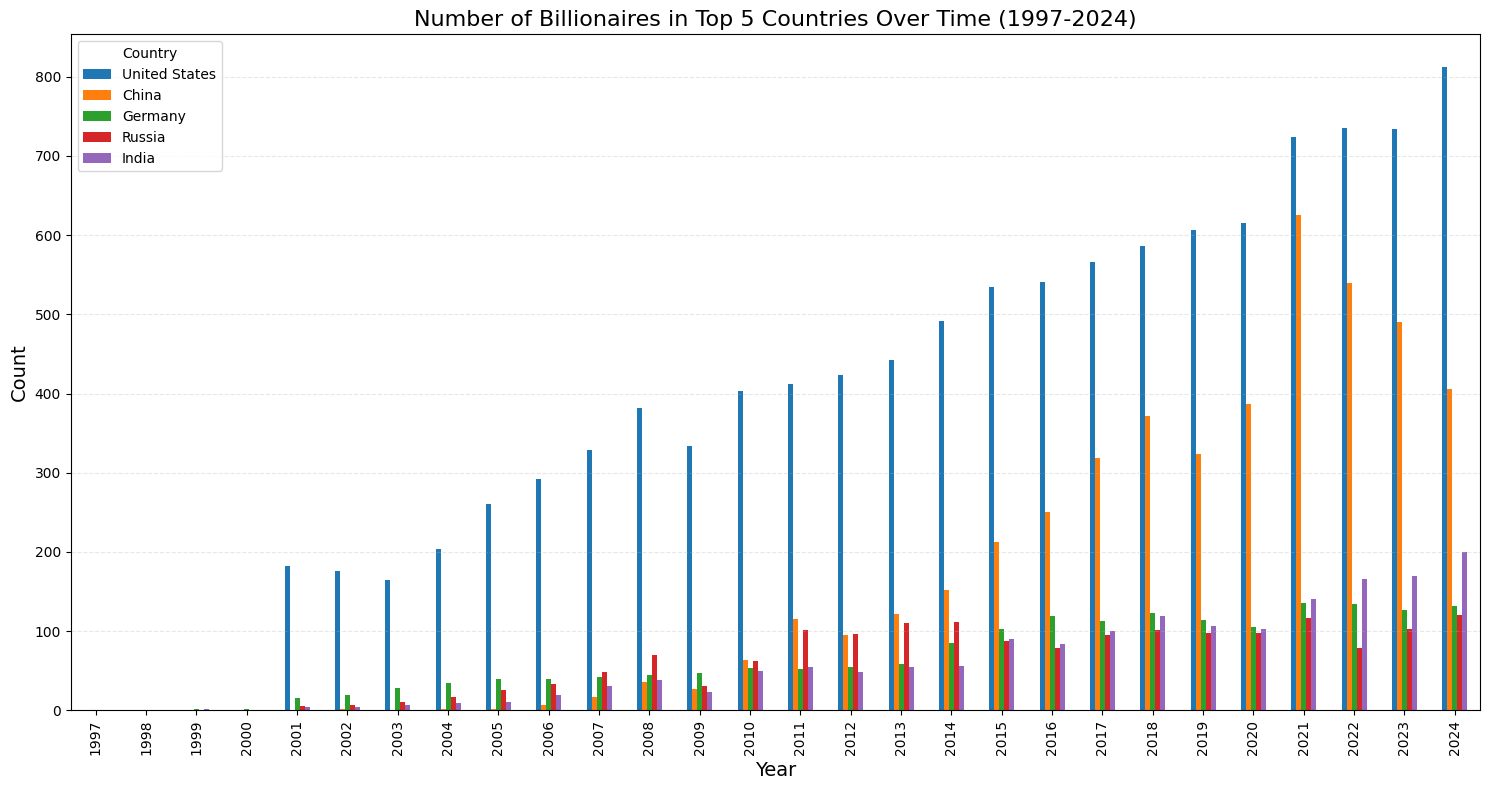

In [ ]:
top_countries_all_time = df['country_of_citizenship'].value_counts().head(5).index
country_counts_by_year = pd.crosstab(df['year'], df['country_of_citizenship'])
top_countries_by_year = country_counts_by_year[top_countries_all_time]

plt.figure(figsize=(15, 8))
top_countries_by_year.plot(kind='bar', figsize=(15, 8))
plt.title('Number of Billionaires in Top 5 Countries Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Country')
plt.tight_layout()
plt.savefig('top_countries_by_year.png')

### 7. INDUSTRY TRENDS OVER TIME

<Figure size 1500x800 with 0 Axes>

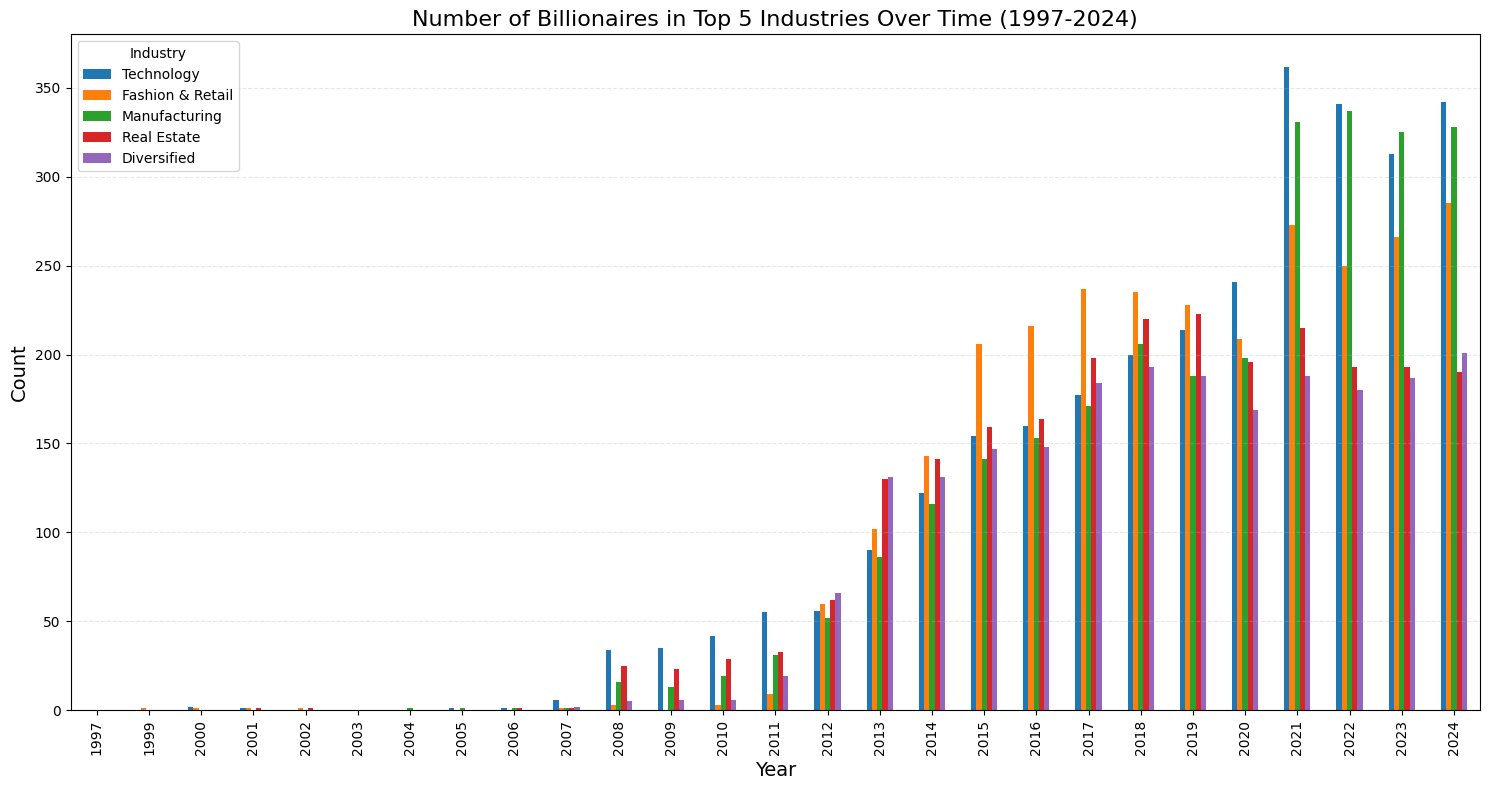

In [ ]:
top_industries_all_time = df['business_category'].value_counts().head(5).index
industry_counts_by_year = pd.crosstab(df['year'], df['business_category'])

# Handle potential missing industries in some years
for industry in top_industries_all_time:
    if industry not in industry_counts_by_year.columns:
        industry_counts_by_year[industry] = 0

top_industries_by_year = industry_counts_by_year[top_industries_all_time]

plt.figure(figsize=(15, 8))
top_industries_by_year.plot(kind='bar', figsize=(15, 8))
plt.title('Number of Billionaires in Top 5 Industries Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Industry')
plt.tight_layout()
plt.savefig('top_industries_by_year.png')


### 8. AGE DISTRIBUTION OVER TIME

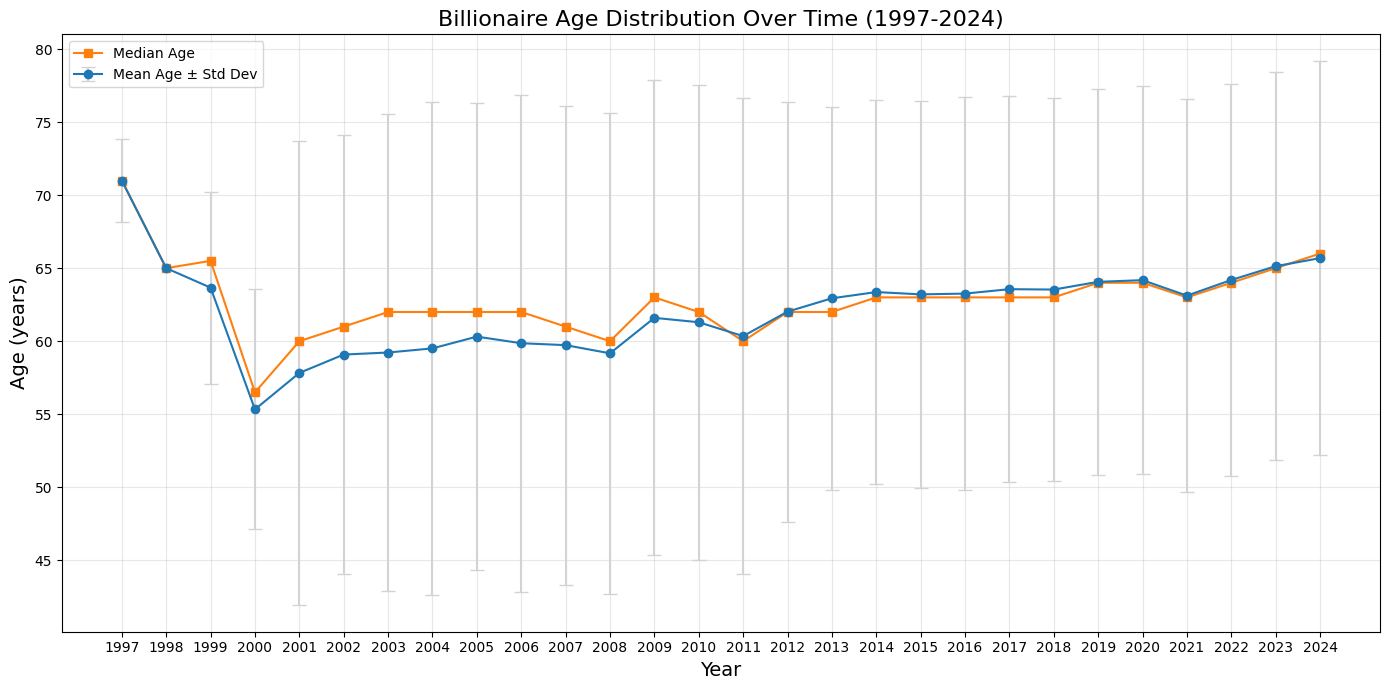

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
age_stats_by_year = df.groupby('year')['age'].agg(['mean', 'median', 'std']).reset_index()

plt.figure(figsize=(14, 7))
plt.errorbar(
    age_stats_by_year['year'],
    age_stats_by_year['mean'],
    yerr=age_stats_by_year['std'],
    fmt='o-',
    capsize=5,
    ecolor='lightgray',
    label='Mean Age ± Std Dev'
)
plt.plot(age_stats_by_year['year'], age_stats_by_year['median'], 's-', label='Median Age')
plt.title('Billionaire Age Distribution Over Time (1997-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age (years)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(age_stats_by_year['year'])
plt.tight_layout()
plt.savefig('age_distribution_by_year.png')

### 9. WEALTH CONCENTRATION OVER TIME (TOP 10% VS BOTTOM 90%)

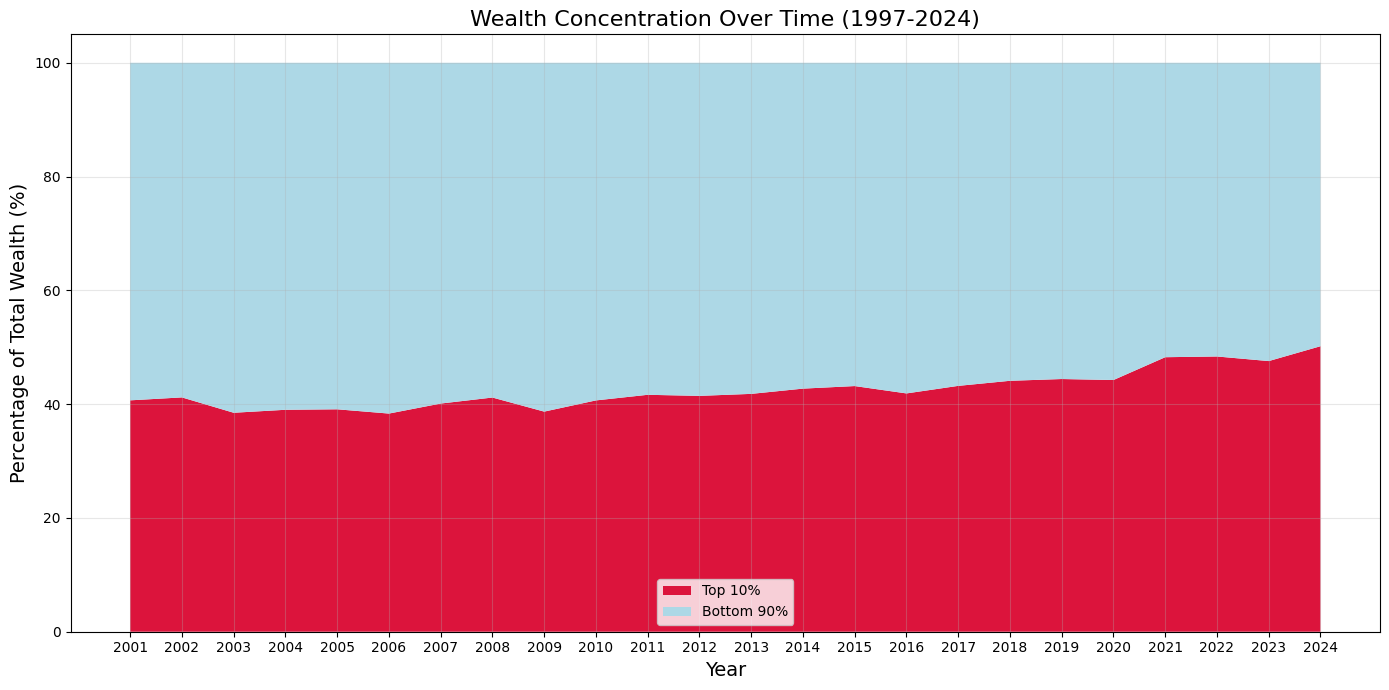

In [ ]:
def calculate_wealth_concentration(year_data):
    if len(year_data) < 10:  # Need minimum sample size
        return None, None

    # Sort by net worth (descending)
    sorted_data = year_data.sort_values('net_worth_numeric', ascending=False)

    # Calculate cutoff for top 10%
    cutoff_idx = max(1, int(len(sorted_data) * 0.1))
    top_10pct = sorted_data.iloc[:cutoff_idx]
    bottom_90pct = sorted_data.iloc[cutoff_idx:]

    # Calculate total wealth and percentages
    total_wealth = sorted_data['net_worth_numeric'].sum()
    top_10pct_wealth = top_10pct['net_worth_numeric'].sum()
    bottom_90pct_wealth = bottom_90pct['net_worth_numeric'].sum()

    # Calculate percentages
    top_10pct_percentage = (top_10pct_wealth / total_wealth) * 100
    bottom_90pct_percentage = (bottom_90pct_wealth / total_wealth) * 100

    return top_10pct_percentage, bottom_90pct_percentage

wealth_concentration = []
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    top_10pct_pct, bottom_90pct_pct = calculate_wealth_concentration(year_data)
    if top_10pct_pct is not None:
        wealth_concentration.append({
            'year': year,
            'top_10pct': top_10pct_pct,
            'bottom_90pct': bottom_90pct_pct
        })

wealth_concentration_df = pd.DataFrame(wealth_concentration)

if not wealth_concentration_df.empty:
    plt.figure(figsize=(14, 7))
    plt.stackplot(
        wealth_concentration_df['year'],
        wealth_concentration_df['top_10pct'],
        wealth_concentration_df['bottom_90pct'],
        labels=['Top 10%', 'Bottom 90%'],
        colors=['crimson', 'lightblue']
    )
    plt.title('Wealth Concentration Over Time (1997-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Percentage of Total Wealth (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xticks(wealth_concentration_df['year'])
    plt.tight_layout()
    plt.savefig('wealth_concentration_by_year.png')

###  10. NETWORK ANALYSIS: CHANGES IN BILLIONAIRE POPULATION


Top 10 most persistent billionaires:
                            years_present
Richard Schulze                        24
Bruce Kovner                           24
Vagit Alekperov                        24
Ty Warner                              24
Donald Bren                            24
Charles Ergen                          24
Robert Rowling                         24
Gordon Getty                           24
Richard Branson                        24
Alfredo Harp Helu & family             24


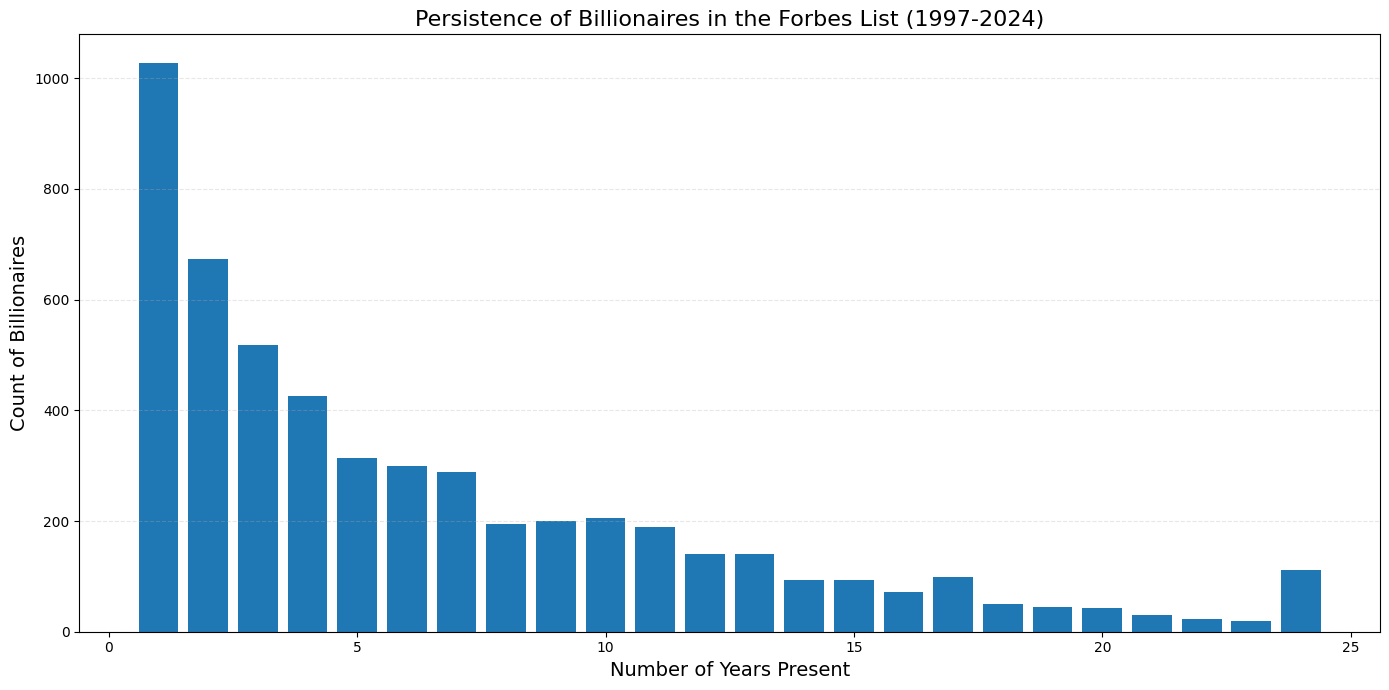


Top 10 most persistent billionaires:
                            years_present
Richard Schulze                        24
Bruce Kovner                           24
Vagit Alekperov                        24
Ty Warner                              24
Donald Bren                            24
Charles Ergen                          24
Robert Rowling                         24
Gordon Getty                           24
Richard Branson                        24
Alfredo Harp Helu & family             24


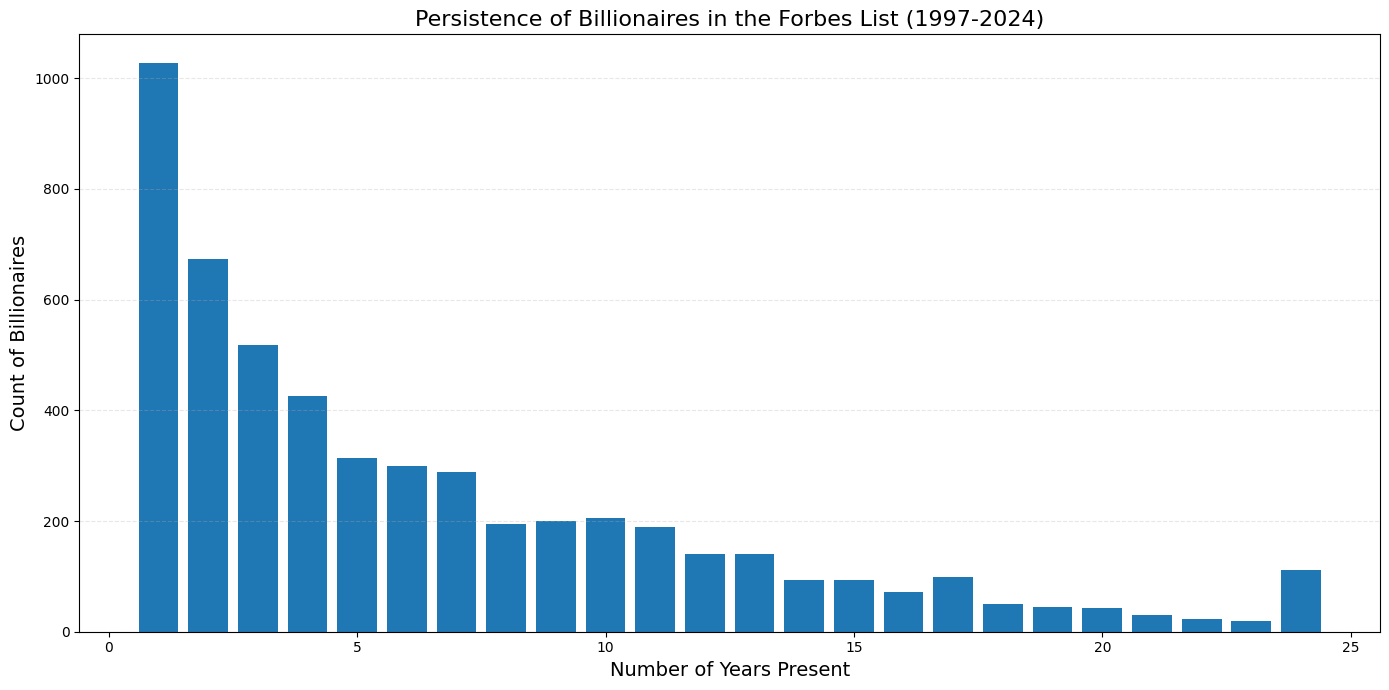

In [ ]:
# Track changes in the billionaire list over time
years = sorted(df['year'].unique())
billionaire_appearance = {year: set(df[df['year'] == year]['full_name']) for year in years}

# Find unique billionaires across all years
all_billionaires = set()
for year_set in billionaire_appearance.values():
    all_billionaires.update(year_set)

# Create a "persistence" metric - in how many years each billionaire appears
persistence = {}
for billionaire in all_billionaires:
    count = sum(1 for year in years if billionaire in billionaire_appearance[year])
    persistence[billionaire] = count

persistence_df = pd.DataFrame.from_dict(persistence, orient='index', columns=['years_present'])
persistence_df = persistence_df.sort_values('years_present', ascending=False)

plt.figure(figsize=(14, 7))
persistence_counts = persistence_df['years_present'].value_counts().sort_index()
plt.bar(persistence_counts.index, persistence_counts.values)
plt.title('Persistence of Billionaires in the Forbes List (1997-2024)', fontsize=16)
plt.xlabel('Number of Years Present', fontsize=14)
plt.ylabel('Count of Billionaires', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('billionaire_persistence.png')

# Print top 10 most persistent billionaires
print("\nTop 10 most persistent billionaires:")
print(persistence_df.head(10))